# qaoa_vanilla

In this notebook we will show how a simple optimization loop looks like in a qaoa "vanilla" approach.

## Setup

First of all set up the correct paths and import the libraries and modules needed.

### Paths

In [1]:
import os
os.chdir("..")

```
qaoa
    |
    |_ config.py
    |
    |_requirements.txt
    |
    |_ classes
        |
        |_ Problems.py
        |
        |_ Qaoa.py
    |
    |_ functions
        |
        |_ maxcut_utilities.py
        |
        |_ qaoa_utilities.py
        |
        |_ optimizers.py
        |
        |_ symetry_utilities.py
    |
    |_ data
        |
        |_ generate_data.ipynb
        |
        |_ graph_0.nx
        .
        .
        .
        |_ graph_15.nx
    |
    .
    .
    .
```

### Libraries

In [2]:
from classes import Qaoa as Q
from classes import Problems as P
from functions import qaoa_utilities as qaoa_utils
from functions import maxcut_utilities as mcut_utils
from functions import qaoa_optimizers as optims

In [3]:
import numpy as np
import pickle
import sys

In [4]:
from config import *

### Data loading

Throughout the project we will use the following graphs:

- $\small{\texttt{graph}\_0}\dots,\small{\texttt{graph}\_3}$ are **complete graphs** with $n=4,6,8,10$ nodes;
- $\small{\texttt{graph}\_4}\dots,\small{\texttt{graph}\_7}$ are **Erdos-Renyi graphs** with $n=4,6,8,10$ nodes and $p=0.5$;
- $\small{\texttt{graph}\_8}\dots,\small{\texttt{graph}\_11}$ are **Complete (full) rary trees** with $n=4,6,8,10$ nodes and branching factor of 2;
- $\small{\texttt{graph}\_12}\dots,\small{\texttt{graph}\_15}$ are **random regular graphs** with $n=4,6,8,10$ nodes with degree of 3.

We will also compute the approximation ratio as a performance metric, which is based on the results of a qaoa execution and the true optimal value stored in the results directory.

In [5]:
# Graphs

graphs = []
for i in range(num_graphs):
    sys.path.append("classes/")
    path = "data/graph_"+str(i)+".nx"
    with open(path, 'rb') as f:
        g = pickle.load(f)
    graphs.append(g)

### Qaoa class instantiation

In [6]:
# Select a graph 
G = graphs[idx]

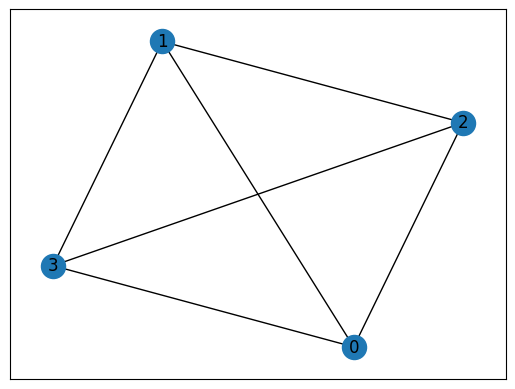

In [7]:
G.get_draw()

In [8]:
# Generate initial random angles
betas = qaoa_utils.generate_parameters(n=p, k=1, seed=seed)
gammas = qaoa_utils.generate_parameters(n=p, k=2, seed=seed)

In [9]:
# Instantiate QAOA 
qaoa = Q.Qaoa(p=p, G=G, betas=betas, gammas=gammas, mixer=mixer, seed=seed, verbose=verbose)

In [10]:
qaoa.get_circuit().draw()

┌───┐ ░                                                            »
q_0: ┤ H ├─░───■─────────────────────■────■─────────────────────■────■──»
     ├───┤ ░ ┌─┴─┐┌───────────────┐┌─┴─┐  │                     │    │  »
q_1: ┤ H ├─░─┤ X ├┤ Rz(params[2]) ├┤ X ├──┼─────────────────────┼────┼──»
     ├───┤ ░ └───┘└───────────────┘└───┘┌─┴─┐┌───────────────┐┌─┴─┐  │  »
q_2: ┤ H ├─░────────────────────────────┤ X ├┤ Rz(params[2]) ├┤ X ├──┼──»
     ├───┤ ░                            └───┘└───────────────┘└───┘┌─┴─┐»
q_3: ┤ H ├─░───────────────────────────────────────────────────────┤ X ├»
     └───┘ ░                                                       └───┘»
c: 4/═══════════════════════════════════════════════════════════════════»
                                                                        »
«                                                                            »
«q_0: ────────────────────────────────────■──────────────────────────────────»
«                                         │                                  »
«q_1: ────────■───────────────────────────┼────■────■─────────────────────■──»
«           ┌─┴─┐      ┌───────────────┐  │  ┌─┴─┐  │                     │  »
«q_2: ──────┤ X ├──────┤ Rz(params[2]) ├──┼──┤ X ├──┼─────────────────────┼──»
«     ┌─────┴───┴─────┐└───────────────┘┌─┴─┐└───┘┌─┴─┐┌───────────────┐┌─┴─┐»
«q_3: ┤ Rz(params[2]) ├─────────────────┤ X ├─────┤ X ├┤ Rz(params[2]) ├┤ X ├»
«     └───────────────┘                 └───┘     └───┘└───────────────┘└───┘»
«c: 4/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                 ░ ┌───────────────┐ ░  ░      »
«q_0: ────────────────────────────░─┤ Rx(params[0]) ├─░──░───■──»
«                                 ░ ├───────────────┤ ░  ░ ┌─┴─┐»
«q_1: ────────────────────────────░─┤ Rx(params[0]) ├─░──░─┤ X ├»
«                                 ░ ├───────────────┤ ░  ░ └───┘»
«q_2: ──■─────────────────────■───░─┤ Rx(params[0]) ├─░──░──────»
«     ┌─┴─┐┌───────────────┐┌─┴─┐ ░ ├───────────────┤ ░  ░      »
«q_3: ┤ X ├┤ Rz(params[2]) ├┤ X ├─░─┤ Rx(params[0]) ├─░──░──────»
«     └───┘└───────────────┘└───┘ ░ └───────────────┘ ░  ░      »
«c: 4/══════════════════════════════════════════════════════════»
«                                                               »
«                                                                            »
«q_0: ───────────────────■────■─────────────────────■────■───────────────────»
«     ┌───────────────┐┌─┴─┐  │                     │    │                   »
«q_1: ┤ Rz(params[3]) ├┤ X ├──┼─────────────────────┼────┼──────────■────────»
«     └───────────────┘└───┘┌─┴─┐┌───────────────┐┌─┴─┐  │        ┌─┴─┐      »
«q_2: ──────────────────────┤ X ├┤ Rz(params[3]) ├┤ X ├──┼────────┤ X ├──────»
«                           └───┘└───────────────┘└───┘┌─┴─┐┌─────┴───┴─────┐»
«q_3: ─────────────────────────────────────────────────┤ X ├┤ Rz(params[3]) ├»
«                                                      └───┘└───────────────┘»
«c: 4/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                »
«q_0: ───────────────────■───────────────────────────────────────»
«                        │                                       »
«q_1: ───────────────────┼────■────■─────────────────────■───────»
«     ┌───────────────┐  │  ┌─┴─┐  │                     │       »
«q_2: ┤ Rz(params[3]) ├──┼──┤ X ├──┼─────────────────────┼────■──»
«     └───────────────┘┌─┴─┐└───┘┌─┴─┐┌───────────────┐┌─┴─┐┌─┴─┐»
«q_3: ─────────────────┤ X ├─────┤ X ├┤ Rz(params[3]) ├┤ X ├┤ X ├»
«                      └───┘     └───┘└───────────────┘└───┘└───┘»
«c: 4/═══════════════════════════════════════════════════════════»
«                                                        

## QAOA simple optimization

In [11]:
# QAOA execution (simple optimization)
_, f = optims.simple_optimization(qaoa, method=method, seed=seed, shots=shots, verbose=verbose)
_,f 

(array([0.47528508, 1.22778158, 0.60818521, 1.19562008]), -3.923828125)